In [68]:
# For division
from __future__ import division

#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data
import pandas_datareader
import pandas_datareader.data as pdweb

# For time stamps
from datetime import datetime

In [69]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()

In [113]:
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = pdweb.DataReader(stock, 'stooq')[:252]

In [114]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.00000,2.520000e+02
mean,190.721786,192.754123,188.725980,190.73250,3.292627e+07
std,20.952217,21.089834,20.841029,20.88372,1.409566e+07
min,142.280000,143.990000,140.320000,140.51000,1.140522e+07
25%,173.252500,174.532500,172.422500,173.45250,2.327401e+07
50%,195.440000,198.000000,193.200000,195.87500,2.987407e+07
75%,206.737500,208.382500,204.240000,206.56000,3.934899e+07
max,227.260000,229.910000,226.270000,228.52000,9.774028e+07


In [115]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-09-06 to 2018-09-06
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null float64
dtypes: float64(5)
memory usage: 11.8 KB


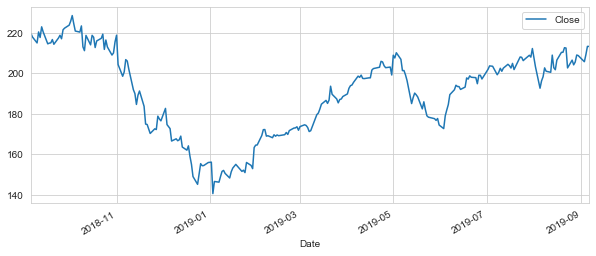

In [116]:
AAPL['Close'].plot(legend=True, figsize = (10,4))

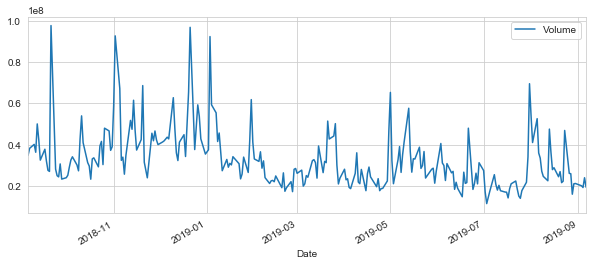

In [117]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [118]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    AAPL[column_name] = pd.DataFrame.rolling(AAPL['Close'], ma).mean()

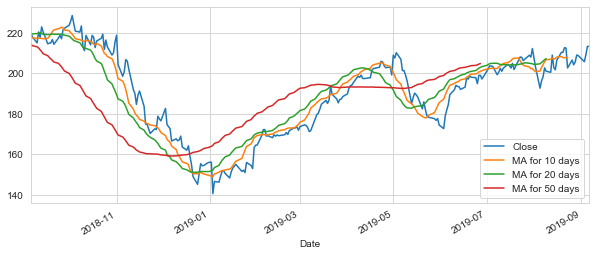

In [119]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

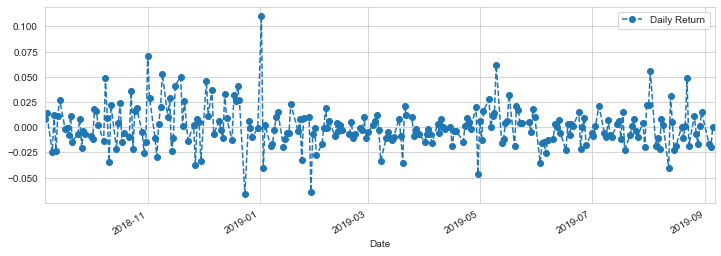

In [120]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

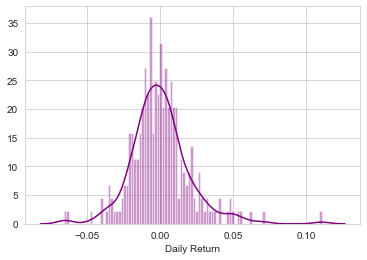

In [121]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [141]:
closing_df = pdweb.DataReader(tech_list,'stooq', start)[2184:]['Close']

In [142]:
closing_df

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-09-06,219.69,1958.31,1171.44,107.05
2018-09-07,217.92,1952.07,1164.83,106.53
2018-09-10,214.99,1939.01,1164.64,107.69
2018-09-11,220.43,1987.15,1177.36,109.52
2018-09-12,217.69,1990.00,1162.82,109.98
2018-09-13,222.95,1989.87,1175.33,111.16
2018-09-14,220.42,1970.19,1172.53,111.62
2018-09-17,214.54,1908.03,1156.05,110.41
2018-09-18,214.90,1941.05,1161.22,111.46


In [143]:
tech_rets = closing_df.pct_change()

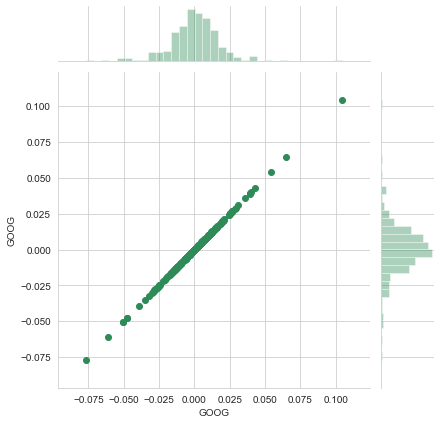

In [144]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

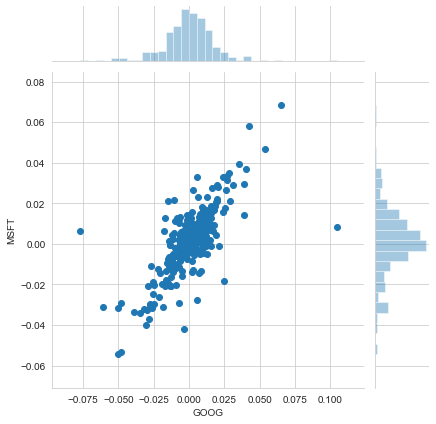

In [145]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

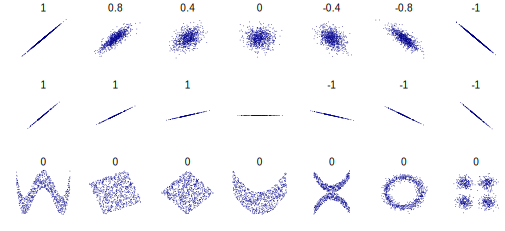

In [146]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

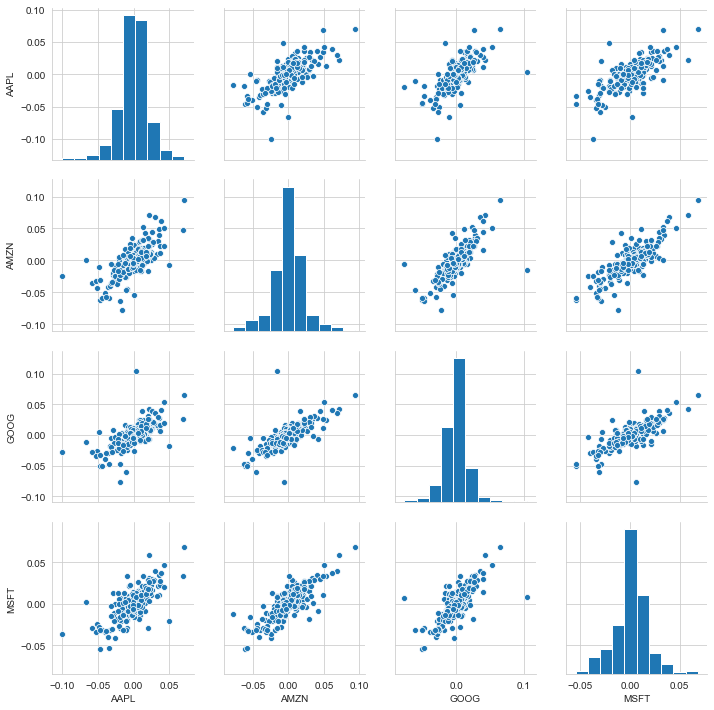

In [147]:
sns.pairplot(tech_rets.dropna())

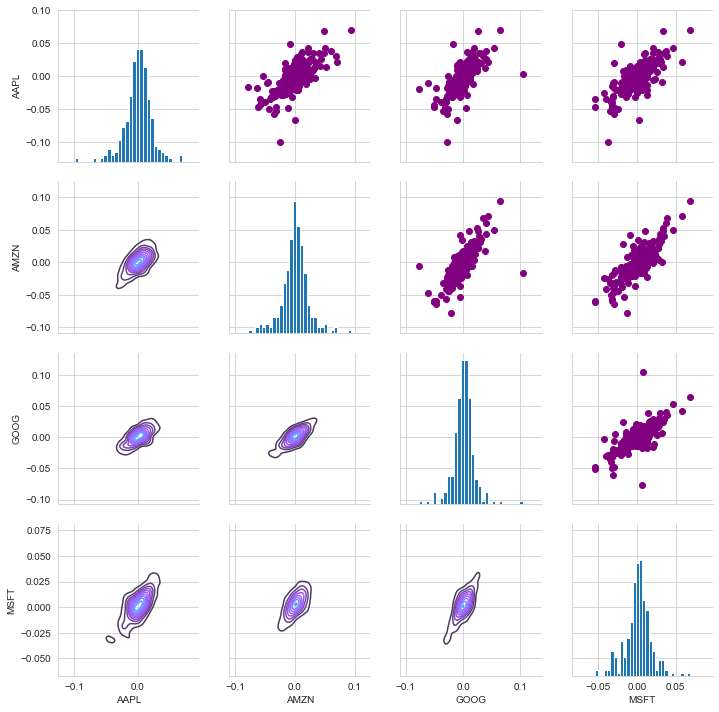

In [169]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

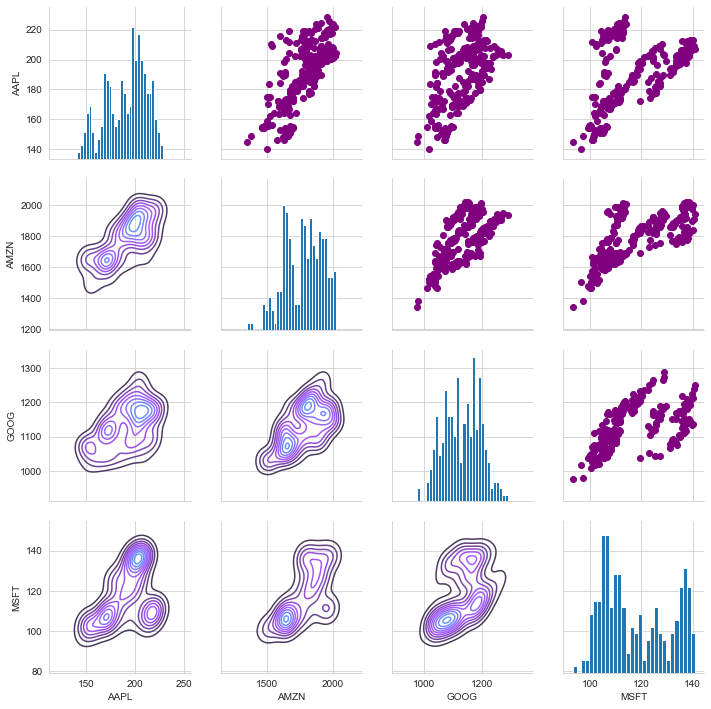

In [170]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

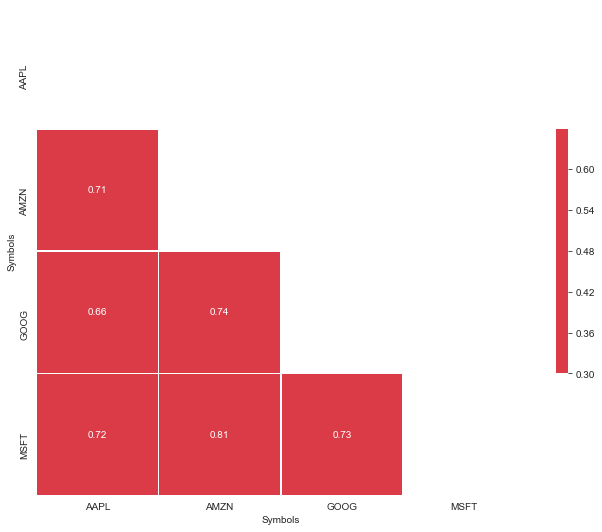

In [171]:
# Compute the correlation matrix
corr = tech_rets.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

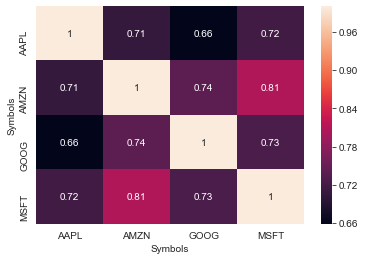

In [172]:
sns.heatmap(corr, annot=True)

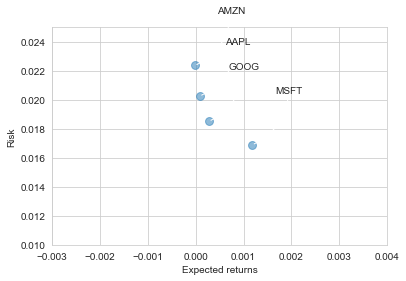

In [174]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s = area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

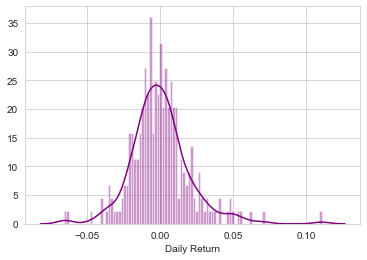

In [156]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [158]:
rets['AAPL'].quantile(0.05)

-0.03317846395234614

In [175]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [176]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [177]:
GOOG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-06,1208.13,1212.02,1202.52,1204.93,1072143
2019-09-05,1191.53,1213.04,1191.53,1211.38,1408601
2019-09-04,1176.71,1183.48,1171.00,1181.41,1068968
2019-09-03,1177.03,1186.89,1163.20,1168.39,1480420
2019-08-30,1198.50,1198.50,1183.80,1188.10,1129959


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

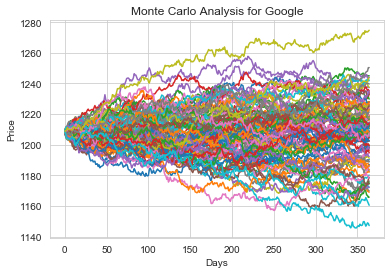

In [181]:
start_price = 1208.13

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [182]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

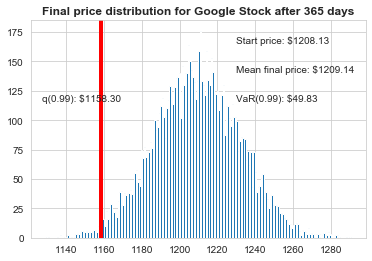

In [183]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');